In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



%matplotlib notebook

In [2]:
G = nx.karate_club_graph()

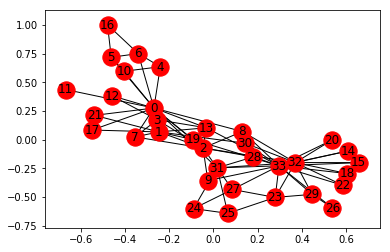

In [3]:
plt.figure()
nx.draw_networkx(G)

In [4]:
N= G.number_of_nodes()    
E= G.number_of_edges()

In [5]:
from networkx.algorithms import approximation as apxa

k_components = apxa.k_components(G)


In [6]:
from networkx.algorithms import centrality


In [7]:
#list(centrality.degree_centrality(G).values())
degree_centrality = np.asarray(list(centrality.degree_centrality(G).values()))


In [13]:
from hcga.Operations import DistributionFitting

DistributionFitting.power_law_fit(degree_centrality,bins=10)[0][-2]

0.030303030303030297

In [10]:
from hcga.Operations import centrality_degree

features = centrality_degree.DegreeCentrality(G,10)



IndexError: invalid index to scalar variable.